In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
"""
Load data.
"""

df = pd.read_csv("real_estate.csv")
df = df.drop(columns=["No"])

features = df.columns[:-1]
X = df[features]

target = "Y house price of unit area"
Y = df[target]

df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [6]:
"""
Overview of values in the dataset.

Results: 
 - No categorical data. No need for encoding.
"""

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [7]:
"""
Check if there are missing values.

Results: 
 - None. No need to remove any rows or columns. 
"""

df.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

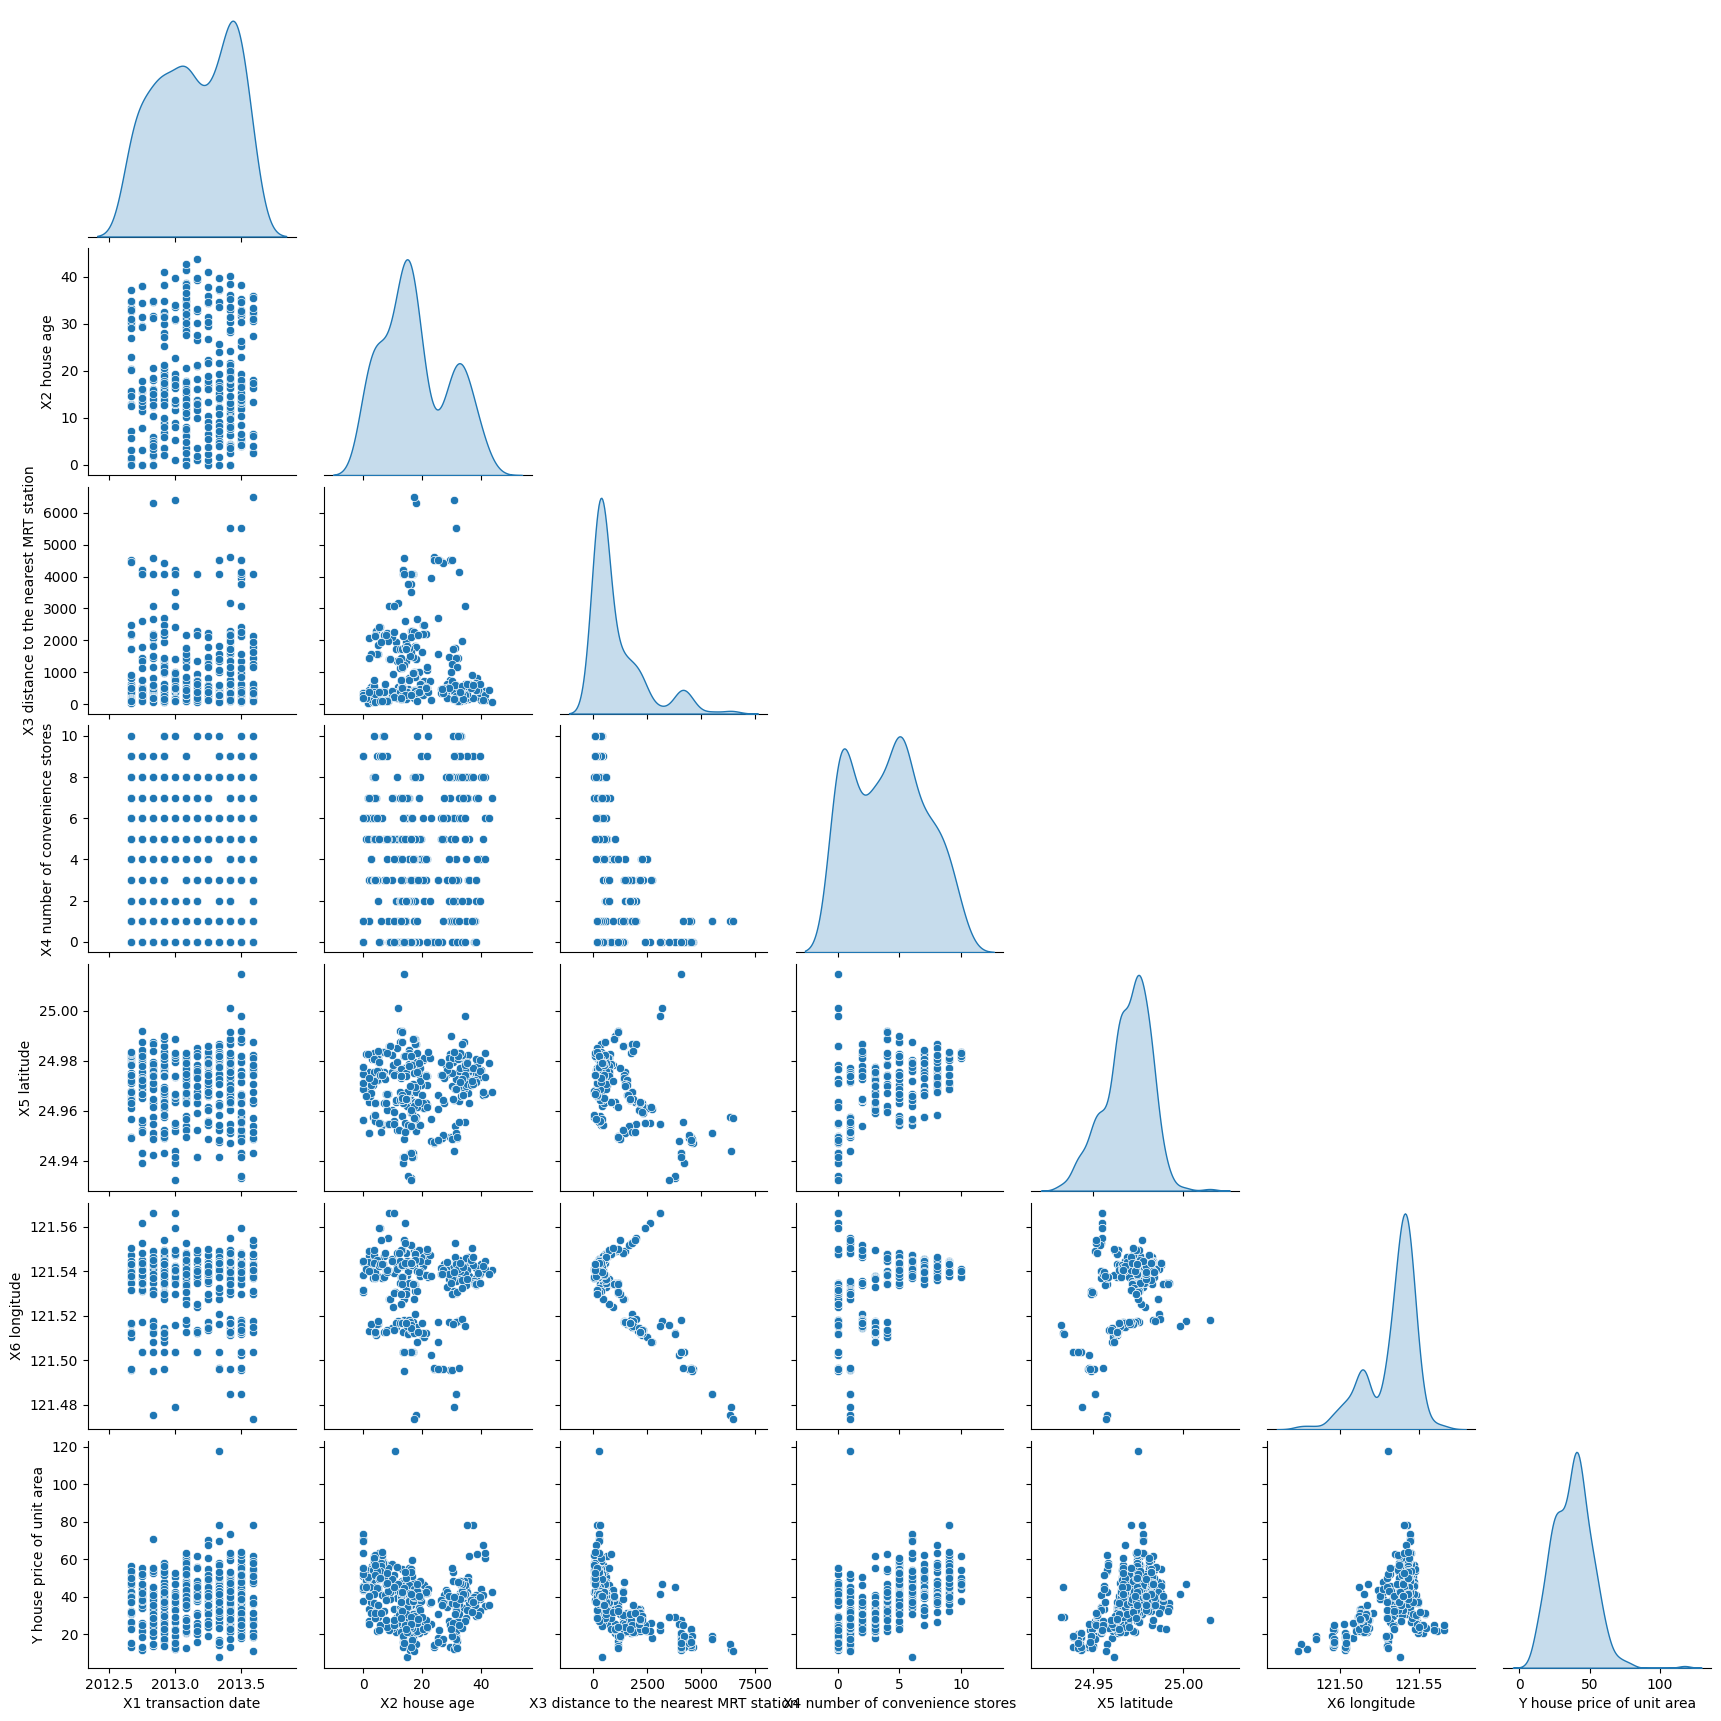

In [8]:
"""
Visualize distributions and relationships between variables.

Results: 
 - Several distributions are skewed and a few appear to have outliers in the higher range.
 - Very different scales (e.g., X3 vs. X4) => perform scaling if using linear regression model.
 - No signs of linearity between any feature and price => use non-linear model or perform non-linear transformation.
"""

sns.pairplot(df, diag_kind='kde', corner=True)
plt.show()

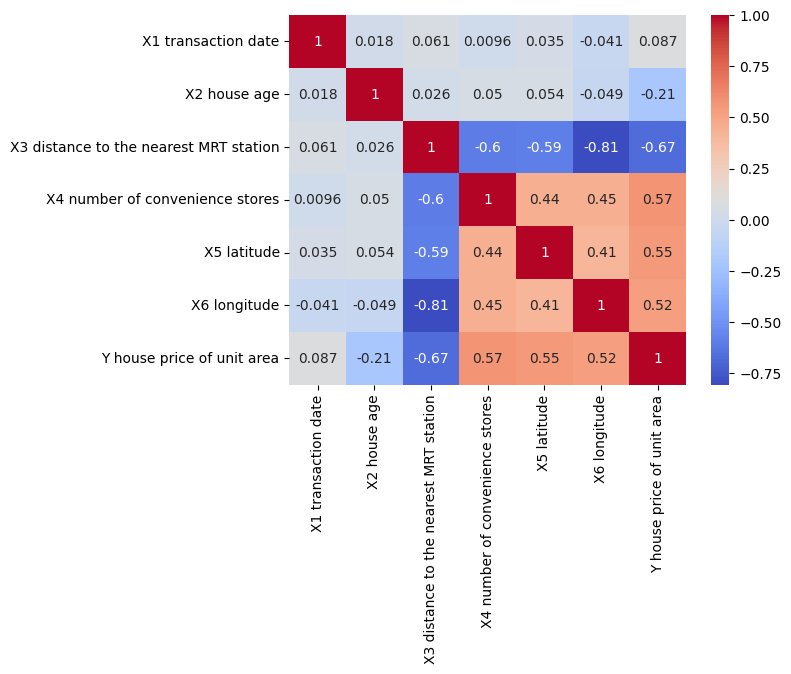

In [9]:
"""
Check correlation between variables.

Results:
 - Strong correlation between X3, X4, X5, X6 and price.
 - No or weak correlation between X1, X2 and price.
"""

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()